# Esercitazione 10

## 1 Simulated annealing

### 1.1 Obiettivo

L'obiettivo di questo primo esercizio è l'implementazione del simulated annealing per la risoluzione del problema del commesso viaggiatore.

### 1.2 L'algoritmo

Il simulated annealing è una particolare tecnica che può essere utilizzata per la risoluzione dei problemi di ottimizzazione. Essa prende spunto da quello che avviene naturalmente durante il raffreddamento di un sistema: se il raffreddamento avviene sufficientemente lentamente lasciando al sistema la possibilità di esplorare a sufficienza lo spazio degli stati, esso evolverà fino ad essere congelato nella configurazione meno energetica.

Lo stesso concetto viene riprodotto nella risoluzione di un problema di ottimizzazione nel seguente modo:
- si decide una "annealing schedule". Ovvero, la sequenza di temperature $T_i$ a cui verrà progressivamente portato il sistema, insieme al numero $n_i$ di step Monte Carlo eseguiti a ciascuna temperatura
- si parte quindi da $T_0$ con una configurazione iniziale $x_0$ che rappresenta una possibile soluzione al problema che si vuole risolvere
- vengono quindi eseguiti $n_0$ step Monte Carlo 
- la configurazione finale ottenuta è usata come punto di partenza per gli $n_1$ step a temperatura $T_1$
- si continuano le iterazioni fino al raggiungimento dell'ultimo step all'ultima temperatura. Questa configurazione rappresenterà la soluzione proposta

Uno step Monte Carlo, ad una specifica temperatura $T_i$, corrisponde a:
- calcolare il valore della funzione di costo sulla configurazione corrente $L(x_i)$
- proporre una nuova configurazione $x_{i+1}$
- calcolare il valore della funzione di costo sulla nuova configurazione
- accettare la nuova configurazione proposta con probabilità data da 

$$ P = 
\begin{cases}
    e^{-\beta_i(L(x_{i+1})-L(x_i))}, \hspace{10pt} \text{se} \hspace{5pt} L(x_{i+1})>L(x_{i}) \\
    1, \hspace{60pt} \text{otherwise}
\end{cases}
$$

Dove $\beta$ è l'inverso della temperatura fittizia. Questi step corrispondono all'applicazione dell'algoritmo di Metropolis per il campionamento di una distribuzione di probabilità proporzionale al fattore di Boltzmann dove la funzione di costo rappresenta l'energia della configurazione. È quindi evidente come questo processo simuli il raffreddamento del sistema.

Teoricamente, affinchè sia soddisfatto il principio del bilancio dettagliato, la probabilità di accettazione da utilizzare sarebbe la precedente soltanto se il meccanismo con cui viene proposta la nuova configurazione fosse simmetrico. Tuttavia, dato che l'obiettivo è la ricerca del minimo e il campionamento realizzato con l'algoritmo di Metropolis serve soltanto per simulare il raffreddamento, gli errori introdotti utilizzando sempre la probabilità di accettazione sopra proposta sono trascurabili.

### 1.3 Implementazione

Per l'implementazione di questo algoritmo ho utilizzato le classi scritte per l'esercitazione 9. La classe `IncubatorGA` è stata sostituita dalla nuova `IncubatorSA` che utilizza le classi `TSPIndividual` e `TSProblem` per la risoluzione del problema del commesso viaggiatore utilizzando il simulated annealing.

Il costruttore di questa classe prepara la `annealing schedule` secondo le richieste. In questa implementazione viene utilizzato lo stesso numero di step Monte Carlo per ciascuna simulazione. I valori di $\beta$ vengono invece generati avendo specificato il valore massimo, il valore minimo, il numero di valori e se lo spaziamento debba essere lineare o logaritmico.

La funzione fondamentale di questa classe è poi `evolve()`, nella quale viene implementato l'algoritmo spiegato nel paragrafo precedente. La proposta di un nuovo individuo avviene richiamando la funzione `randomMutation()` che esegue sull'individuo corrente una mutazione scelta a caso tra quelle disponibili.

Come funzione di costo ho utilizzato, anche in questo caso 

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

dove $\vec x_i$ sono le coordinate della città i-esima.

### 1.4 Utilizzo

Per essere eseguito il programma richiede 3 argomenti. 

Il primo, obbligatorio, serve per specificare il file in cui salvare la soluzione trovata al problema. In questo file ogni riga rappresenta una diversa città di cui ne sono contenute le coordinate. L'ordine con cui appaiono le righe rappresenta l'ordine con cui le città devono essere visitate secondo la soluzione trovata. 

Il secondo è facoltativo e permette di specificare un file in cui verranno salvati alcuni dati per ciascuno step dell'annealing schedule. Ogni riga rappresenta un diverso step e quindi una diversa temperatura e contiene, in quest'ordine:
- $\beta_i$ = $1/T_i$
- $n_i$: numero di step monte carlo eseguiti a temperatura $T_i$
- loss più bassa ottenuta negli $n_i$ step
- loss dell'ultimo individuo dopo gli $n_i$ step
- tasso di accettazione

Il terzo argomento, anch'esso facoltativo, permette di specificare un file in cui verranno salvati, per ogni riga corrispondente ad ogni soluzione esplorata, la temperatura a cui è stato generato l'indivduo e il valore della funzione di costo valutata su tale soluzione.

I parametri di input vengono introdotti mediante il file `input.dat` nel quale è possibile specificare, nell'ordine:
- numero di città del problema da generare
- tipologia di mappa da generare: città disposte sulla circonferenza o dentro un quadrato
- valore minimo di $\beta$
- valore massimo di $\beta$
- tipologia di spaziamento nella generazione dei $\beta$
- numero di valori di $\beta$
- numero di step Monte Carlo da eseguire a ciascuna temperatura

### 1.4 Risultati

Ho quindi utilizzato il programma realizzato per risolvere il problema del commesso viaggiatore nelle stesse configurazioni utilizzate nel corso dell'esercitazione 9.

Ho utilizzato 100 valori di beta equispaziati in scala logaritmica tra 1 e 1000. Per ciascun valore ho eseguito 10000 step Monte Carlo.

I risultati ottenuti sono i seguenti

#### 1.4.1 Mappa con 32 città sulla circonferenza unitaria

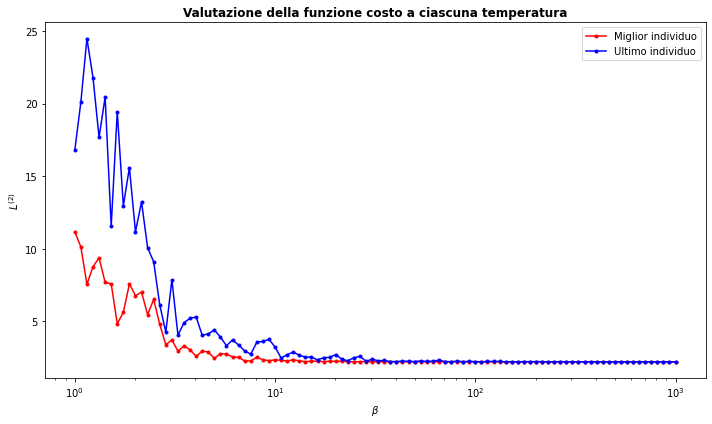

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

beta, best_loss, last_loss= np.genfromtxt('../10/TSPwithSA/circ/best_losses.out', usecols=(0,2, 3), skip_header=1, unpack=True)

fig, axes = plt.subplots(1)
fig.set_size_inches(10,6)

axes.set_title('Valutazione della funzione costo a ciascuna temperatura', fontweight='bold')
axes.set_ylabel('$L^{(2)}$')
axes.set_xlabel('$ \\beta $')
axes.set_xscale('log')
axes.plot(beta, best_loss, color='red', label='Miglior individuo', marker='.')
axes.plot(beta, last_loss, color='blue', label='Ultimo individuo', marker='.')

plt.legend()
plt.tight_layout()
plt.show()

In questo grafico è stato rappresentato il valore della funzione di costo di alcuni individui in funzione di $\beta$ e quindi del rispettivo step nella annealing schedule. Si può osservare come per bassi valori di $\beta$ la corrispondente alta temperatura permetta un'ampia esplorazione dello spazio degli stati mantenendo con scarsa efficacia il sistema nelle configurazioni caratterizzate dai valori minimi via via trovati. 
Questo permette di trovare soluzioni migliori evitando di congelare il sistema in un minimo locale che non costituisca davvero la migliore soluzione del problema che si sta cercando di risolvere. 

Complessivamente si può apprezzare la diminuzione della loss function. Ad alti valori di $\beta$ si osserva invece il congelamento del sistema nella configurazione di minima energia (loss) trovata.

In [2]:
every_loss = np.genfromtxt('../10/TSPwithSA/circ/all_losses.out', usecols=(1), skip_header=1, unpack=True)

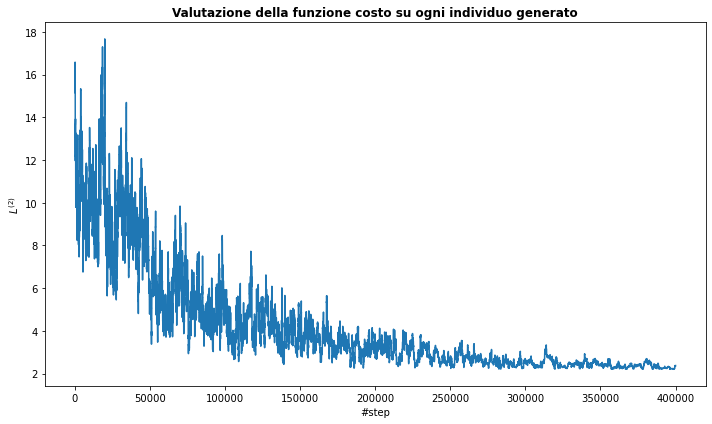

In [3]:
fig, axes = plt.subplots(1)
fig.set_size_inches(10,6)

axes.set_title('Valutazione della funzione costo su ogni individuo generato', fontweight='bold')
axes.set_ylabel('$L^{(2)}$')
axes.set_xlabel('#step')
axes.plot(every_loss[100000:500000])

plt.tight_layout()
plt.show()

Quest'ultimo grafico presenta i valori della loss function ottenuti dalla sua valutazione su ciascun individuo generato nel corso della simulazione. Il grafico è stato tagliato su alcuni step centrali per essere più chiaro. 

Si osservino le fluttuazioni che indicano con quale variabilità viene esplorato lo spazio degli stati. Queste risultano via via minori nel procedere con la simulazione e quindi man mano che aumenta il valore di $\beta$.

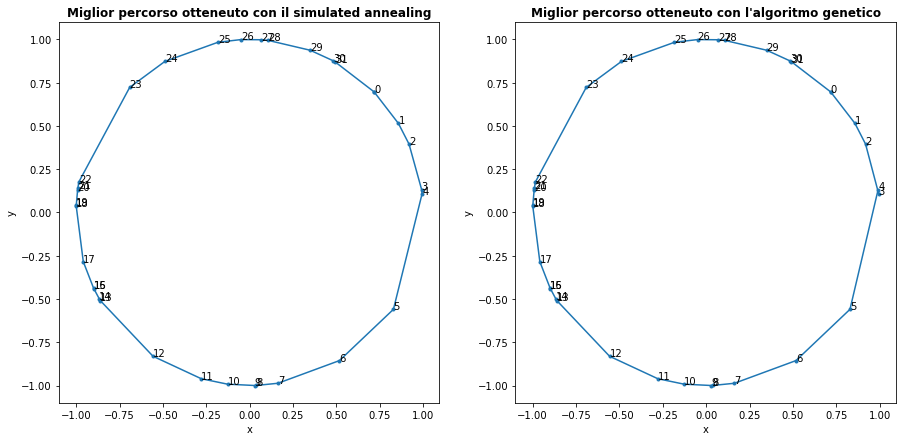

Valore della funzione di costo valutata sulla soluzione ottenuta con il simulated annealing: 2.20
Valore della funzione di costo valutata sulla soluzione ottenuta con l'algoritmo genetico: 2.24


In [4]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,7)
data=[]
data.append(np.genfromtxt('../10/TSPwithSA/circ/best_path.out', usecols=(0,1), skip_header=1, unpack=True))
data.append(np.genfromtxt('../09/TSPwithGA/circ_best/best_path.out', usecols=(0,1), skip_header=1, unpack=True))
title = ['Miglior percorso otteneuto con il simulated annealing',"Miglior percorso otteneuto con l'algoritmo genetico"] 
for i, axe in enumerate(axes):
    axe.set_title(title[i], fontweight='bold')
    axe.plot(data[i][0],data[i][1], marker='.')
    axe.set_xlabel('x')
    axe.set_ylabel('y')
    for j in range(0,len(data[i][0])-1):
        axe.annotate(j, (data[i][0][j],data[i][1][j]))

lossf = open('../10/TSPwithSA/circ/best_path.out', 'r')
loss_sa = float(lossf.readline().split(':')[1])
lossf = open('../09/TSPwithGA/circ_best/best_path.out', 'r')
loss_ga = float(lossf.readline().split(':')[1])
plt.show()
print('Valore della funzione di costo valutata sulla soluzione ottenuta con il simulated annealing: {:.2f}'.format(loss_sa))
print("Valore della funzione di costo valutata sulla soluzione ottenuta con l'algoritmo genetico: {:.3}".format(loss_ga))

Infine in quest'ultima immagine si può osservare la soluzione trovata messa a confronto con quella ottenuta nell'esercitazione 9 tramite l'algoritmo genetico. Le due soluzioni risultano uguali. In realtà vi è una leggera differenza nell'ordine dei punti 3 e 4 che però modifica la loss del percorso di un valore molto piccolo. Dai valori della funzione di costo sulle due soluzioni si osserva come la soluzione trovata con il simulated annealing sia migliore.

#### 1.4.2 Mappa con 32 città nel quadrato

Gli stessi grafici sono stati realizzati anche per i risultati ottenuti nella risoluzione del problema con le città disposte all'interno del quadrato.

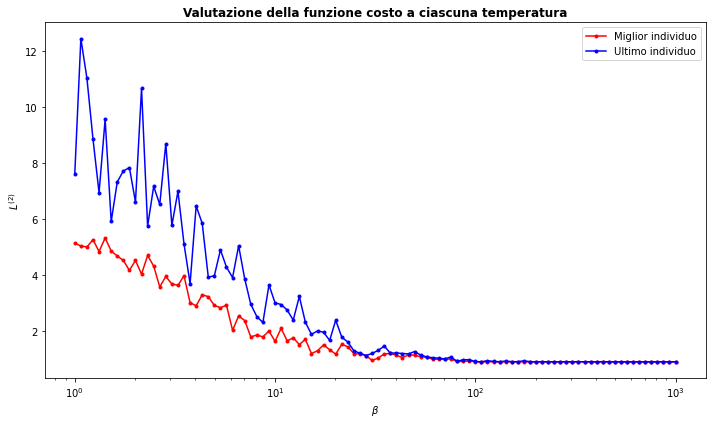

In [5]:
beta, best_loss, last_loss= np.genfromtxt('../10/TSPwithSA/square/best_losses.out', usecols=(0,2, 3), skip_header=1, unpack=True)

fig, axes = plt.subplots(1)
fig.set_size_inches(10,6)

axes.set_title('Valutazione della funzione costo a ciascuna temperatura', fontweight='bold')
axes.set_ylabel('$L^{(2)}$')
axes.set_xlabel('$ \\beta $')
axes.set_xscale('log')
axes.plot(beta, best_loss, color='red', label='Miglior individuo', marker='.')
axes.plot(beta, last_loss, color='blue', label='Ultimo individuo', marker='.')

plt.legend()
plt.tight_layout()
plt.show()

In [6]:
every_loss = np.genfromtxt('../10/TSPwithSA/square/all_losses.out', usecols=(1), skip_header=1, unpack=True)

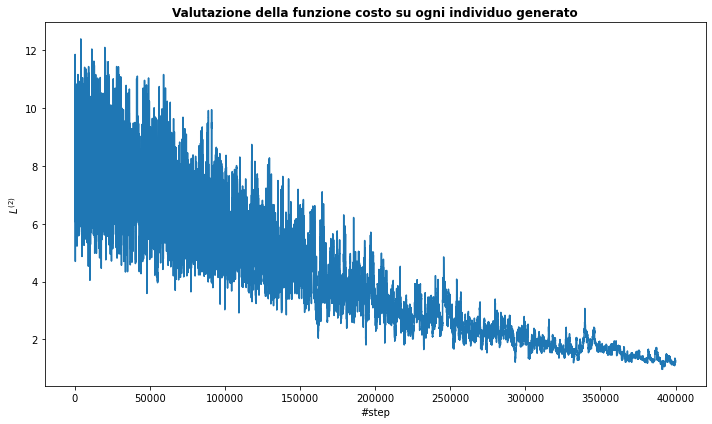

In [7]:
fig, axes = plt.subplots(1)
fig.set_size_inches(10,6)

axes.set_title('Valutazione della funzione costo su ogni individuo generato', fontweight='bold')
axes.set_ylabel('$L^{(2)}$')
axes.set_xlabel('#step')
axes.plot(every_loss[100000:500000])

plt.tight_layout()
plt.show()

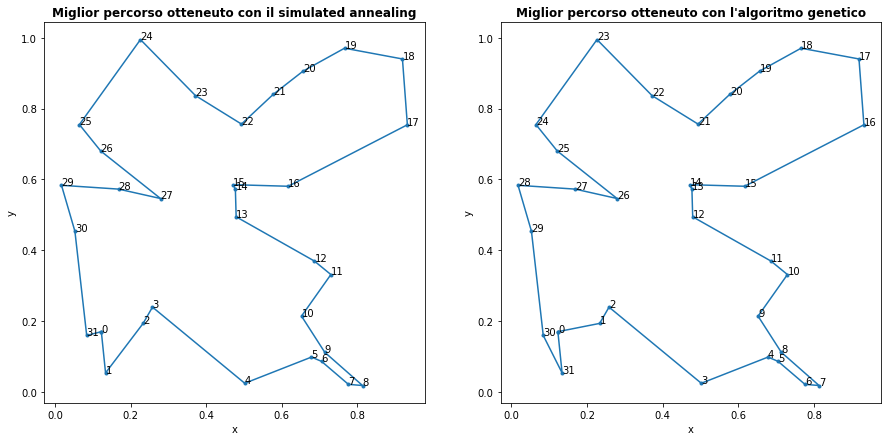

Valore della funzione di costo valutata sulla soluzione ottenuta con il simulated annealing: 0.917
Valore della funzione di costo valutata sulla soluzione ottenuta con l'algoritmo genetico: 0.912


In [8]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,7)
data=[]
data.append(np.genfromtxt('../10/TSPwithSA/square/best_path.out', usecols=(0,1), skip_header=1, unpack=True))
data.append(np.genfromtxt('../09/TSPwithGA/quad_best/best_path.out', usecols=(0,1), skip_header=1, unpack=True))
title = ['Miglior percorso otteneuto con il simulated annealing',"Miglior percorso otteneuto con l'algoritmo genetico"] 
for i, axe in enumerate(axes):
    axe.set_title(title[i], fontweight='bold')
    axe.plot(data[i][0],data[i][1], marker='.')
    axe.set_xlabel('x')
    axe.set_ylabel('y')
    for j in range(0,len(data[i][0])-1):
        axe.annotate(j, (data[i][0][j],data[i][1][j]))

lossf = open('../10/TSPwithSA/square/best_path.out', 'r')
loss_sa = float(lossf.readline().split(':')[1])
lossf = open('../09/TSPwithGA/quad_best/best_path.out', 'r')
loss_ga = float(lossf.readline().split(':')[1])
plt.show()
print('Valore della funzione di costo valutata sulla soluzione ottenuta con il simulated annealing: {:.3f}'.format(loss_sa))
print("Valore della funzione di costo valutata sulla soluzione ottenuta con l'algoritmo genetico: {:.3f}".format(loss_ga))

Anche in questo caso i risultati ottenuti con i due metodi non sono esattamente identici sebbene la funzione di loss valutata sulle due soluzioni abbia lo stesso valore fino alla terza cifra significativa. Questa volta risulta migliore la soluzione trovata con l'algoritmo genetico. Questi metodi hanno la particolarità di trovare spesso soluzioni corrispondenti a minimi locali della funzione di costo che possono non corrispondere al minimo globale che si vorrebbe ottenere. 

Anche i minimi locali possono essere utili nel caso si sia interessati ad ottimizzare un problema senza la necessità di trovare il minimo globale in assoluto. Ad esempio in una applicazione reale del problema precedente la differenza tra i percorsi ottenuti coi due metodi si traduce in pratica nel percorrere una distanza maggiore o minore del tutto trascurabile.

Le diverse performance potrebbero essere dovute anche al diverso numero di individui utilizzati, un numero maggiore porta ad una più larga esplorazione di tutte le configurazioni possibili.

## 2 Calcolo parallelo - Algoritmo genetico in diversi continenti

### 2.1 Obiettivo

L'obiettivo di questa parte di esercitazione è la modifica del programma realizzato nel corso della esercitazione 9 al fine di dividere gli step dell'algoritmo parallelizzandolo.

Si vuole in questo modo ottenere una maggiore efficienza ed introdurre, nella riproduzione dell'evoluzione naturale realizzata, il concetto di continente. Ciascuno ha una propria popolazione che evolve in maniera indipendente con saltuari scambi tra continenti degli individui migliori.

### 2.2 Implementazione

Per la realizzazione di questo esercizio ho utilizzato le librerie MPI. Il modello di parallelizzazione utilizzato è l'SPMD (Single Program Multiple Data): ciascun processo utilizza lo stesso eseguibile che è stato codificato in modo tale che sia in grado di comprendere da quale processo viene eseguito ed eseguire di conseguenza le corrette operazioni.

Tutte le modifiche apportate riguardano la funzione `main()` in cui vengono istanziati gli incubatori e richiamate le funzioni che danno inizio all'evoluzione. 
Il flusso di istruzioni implementato è il seguente:
- Dal processo principale vengono letti i parametri di input dal file `input.dat`
- Queste informazioni vengono poi condivise con gli altri processi tramite un messaggio broadcast
- Sempre dal processo principale viene generato il problema che si vuole risolvere, ovvero le coordinate delle città
- Queste vengono condivise tramite messaggio broadcast con gli altri processi
- In ciascun processo viene istanziato l'incubatore (oggetto della classe `IncubatorGA`)
- Vengono quindi eseguite una serie di iterazioni, in ciascun processo, consistenti in:
    - il sistema viene fatto evolvere per `ngen_exch_interval` iterazioni
    - viene quindi generata nel processo principale una "exchange schedule" ovvero viene estratto casualmente il numero di scambi che devono essere eseguiti tra continenti e i continenti tra i quali devono avvenire.
    - queste informazioni vengono quindi condivise tramite messaggio broadcast con tutti gli altri processi
    - inizia quindi lo scambio degli individui tra i continenti, seguendo la "exchange schedule", tramite messaggi bloccanti. La scelta degli individui da scambiare avviene mediante lo stesso operatore di selezione utilizzato nell'evoluzione della popolazione.
- Una volta eseguite un certo numero prestabilito di queste iterazioni è necessario determinare quale tra i migliori individui generati dai vari processi è effettivamente il migliore. Per far questo le valutazioni della funzione di loss sul miglior individuo generato da ciascun processo vengono tutte comunicate al processo principale tramite la subroutine `MPI_Gather()`. 
- Il processo principale decide quindi quale processo possiede l'individuo migliore e lo comunica agli altri tramite broadcast
- Tale processo salva quindi il suo individuo su file

Per poter implementare questo schema di istruzioni sono anche state implementate alcune semplici funzioni aggiuntive alle classi già presenti. Ad esempio la classe `IncubatorGA` è stata dotata di un metodo che permette di iniettare un nuovo individuo nella sua popolazione.

### 2.3 Utilizzo

Per eseguire il programma si deve utilizzare l'utility `mpiexec`. L'istruzione è la seguente

`mpiexec -np 4 ./main`

dove l'argomento `-np` serve per specificare il numero di processi da utilizzare, in questo caso 4.

Tutti i file di input e output sono contenuti all'interno della cartella `io`.
I parametri della simulazione sono letti dal file `input.dat` che deve contenere nell'ordine:
- numero di città del problema da generare
- tipologia di mappa da generare: città disposte sulla circonferenza o dentro un quadrato
- numero di individui per generazione
- indice q della legge di potenza usata per la selezione
- probabilità di crossover
- probabilità di mutazione
- numero complessivo di generazioni da simulare (questo numero verrà diviso tra i vari processi)
- numero di generazioni da simulare tra uno scambio e l'altro di individui

I file di output prodotti sono:
- `N_Rloss.output`: generato dal processo N (ne viene creato uno da ogni processo) è il file che contiene i valori della funzione di costo valutata su ciascun individuo di ciascuna generazione. Ogni riga rappresenta una diversa generazione. La prima riga contiene informazioni sui parametri con cui è stata eseguita la simulazione.
- `best_path.output`: contiene, nello stesso formato del medesimo file nell'esercizio precedente, la migliore soluzione prodotta.

### 2.4 Risultati

Ho applicato il programma realizzato alla risoluzione dello stesso problema degli esercizi precedenti nel caso delle città disposte all'interno del quadrato.

Anche in questo caso risulta particolarmente influente la scelta degli iperparametri di modo da ottenere una migliore efficienza dell'algoritmo.
Per ottenere i risultati che seguono ho utilizzato:
- numero di individui per generazione = 128
- indice q della legge di potenza usata per la selezione = 3
- probabilità di crossover = 0.6
- probabilità di mutazione = 0.1
- numero complessivo di generazioni da simulare (questo numero verrà diviso tra i vari processi) = $10^4$
- numero di generazioni da simulare tra uno scambio e l'altro di individui = 500

Ho inoltre utilizzato 4 processi.

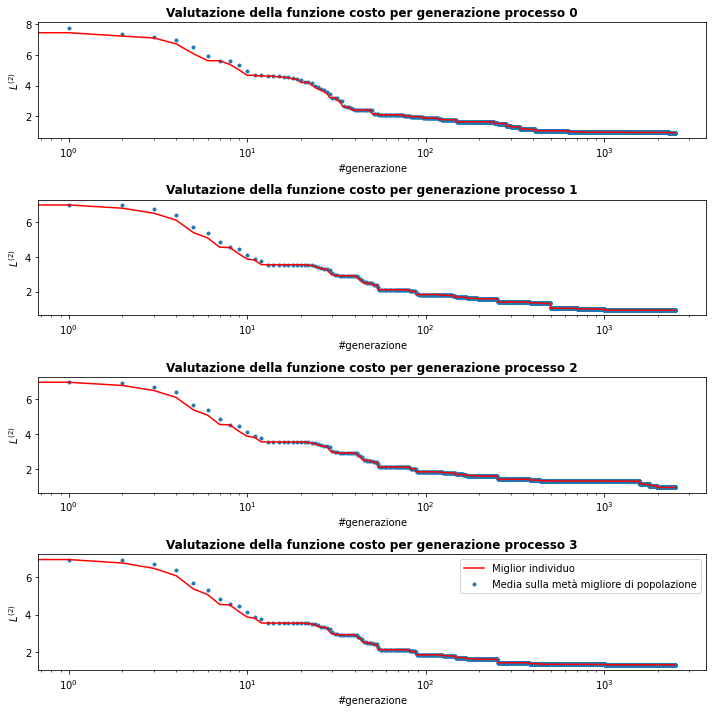

In [9]:
fig, axes = plt.subplots(4,1)
fig.set_size_inches(10,10)

for i, axe in enumerate(axes):
    file = f"../10/TSPwithMPI/io/{i}_Rloss.output"
    losses = np.genfromtxt(file, usecols=range(0,10), skip_header=1, unpack=True)

    ngen = np.arange(0,len(losses[0]), 1)
    
    axe.set_title(f'Valutazione della funzione costo per generazione processo {i}', fontweight='bold')
    axe.set_ylabel('$L^{(2)}$')
    axe.set_xlabel('#generazione')
    axe.set_xscale('log')
    axe.plot(ngen, losses[0], color='red', label='Miglior individuo')

    axe.scatter(ngen, np.mean(losses, axis=0), marker='.', label='Media sulla metà migliore di popolazione')

plt.legend()
plt.tight_layout()
plt.show()

Nel grafico precedente è possibile osservare l'andamento della funzione al procedere con le generazioni successive in ciascuno dei 4 processi in cui viene suddiviso il calcolo. Si possono osservare delle differenze ma complessivamente l'andamento è sempre decrescente.
Le 10000 generazioni sono state suddivise nei quattro gruppi da 2500 ciascuno. I vari continenti scambiano i migliori individui ogni 500 generazioni.

Nell'implementazione dell'algoritmo genetico realizzato nell'esercitazione 9 avevo utilizzato 1000 generazioni. Per poter utilizzare lo stesso numero anche in questo caso avrei dovuto impostare un alto numero di scambi tra continenti. Questo perchè altrimenti la singola evoluzione all'interno di un continente avrebbe impiegato più generazioni per giungere alle stesse soluzioni. Questo però avrebbe reso poco efficiente il programma. Inoltre un alto numero di scambi, che avvengono in maniera bloccante, rende di fatto vana la parallelizzazione implementata.

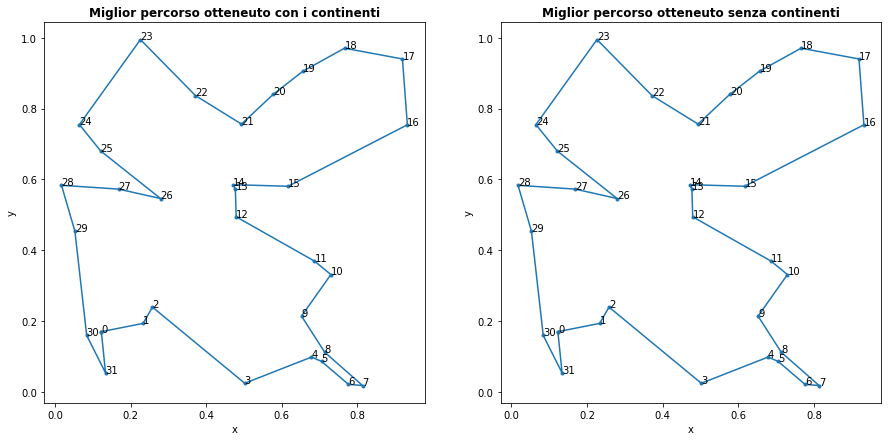

Valore della funzione di costo valutata sulla soluzione ottenuta con i continenti: 0.912
Valore della funzione di costo valutata sulla soluzione ottenuta senza continenti: 0.912


In [10]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,7)
data=[]
data.append(np.genfromtxt('../10/TSPwithMPI/io/best_path.output', usecols=(0,1), skip_header=1, unpack=True))
data.append(np.genfromtxt('../09/TSPwithGA/quad_best/best_path.out', usecols=(0,1), skip_header=1, unpack=True))
title = ["Miglior percorso otteneuto con i continenti", 'Miglior percorso otteneuto senza continenti'] 
for i, axe in enumerate(axes):
    axe.set_title(title[i], fontweight='bold')
    axe.plot(data[i][0],data[i][1], marker='.')
    axe.set_xlabel('x')
    axe.set_ylabel('y')
    for j in range(0,len(data[i][0])-1):
        axe.annotate(j, (data[i][0][j],data[i][1][j]))

lossf = open('../10/TSPwithMPI/io/best_path.output', 'r')
loss_sa = float(lossf.readline().split(':')[1])
lossf = open('../09/TSPwithGA/quad_best/best_path.out', 'r')
loss_ga = float(lossf.readline().split(':')[1])
plt.show()
print('Valore della funzione di costo valutata sulla soluzione ottenuta con i continenti: {:.3f}'.format(loss_sa))
print("Valore della funzione di costo valutata sulla soluzione ottenuta senza continenti: {:.3f}".format(loss_ga))

L'immagine precedente mostra il percorso proposto come soluzione da questa implementazione con i continenti, messo a confronto con quello che era stato ottenuto dall'utilizzo classico dell'algoritmo genetico.
I due risultati sono identici.

Sia in queste simulazioni sia in quelle eseguite nel corso dell'esercitazione 9, ho cercato una configurazione di iperparametri che permettesse di utilizzare il numero minore possibile di individui e generazioni. Come conseguenza ho che i risultati trovati sono buone soluzioni ma non necessariamente quelle ottimali. Inoltre l'esecuzione dell'algoritmo risulta fortemente dipendente dal problema.
Si può quindi aumentare considerevolmente il numero di generazioni e/o individui per generazione, in modo tale da ottenere degli algoritmi di ricerca più robusti.
Ho verificato che l'aumento di questi valori di 10 o 100 volte tanto incrementa il tempo di esecuzione ma lo mantiene entro limiti più che accettabili: al più qualche decina di minuti.

### 2.5 Confronto delle performance

Ho confrontato le performance di questa implementazione con i continenti con quella classica dell'algoritmo genetico realizzata nell'esercitazione 9.

Ho eseguito entrambi i programmi in modo da simulare 10000 generazioni da 128 individui ciascuna per un totale di $1.28\cdot10^6$ individui, i tempi di esecuzioni sono risultati i seguenti:
- implementazione con continenti: $\sim$ 20s
- implementazione senza continenti: $\sim$ 9s

Il programma non parallelizzato sembra quindi più performante.
Questo si spiega col fatto che il codice parallelizzato deve anche scambiare i messaggi, contenenti i migliori individui, tra i vari processi. Questa è una operazione computazionalmente onerosa e il numero di scambi deve essere quindi limitato.

Si ottengono performance migliori con la parallelizzazione aumentando notevolmente il numero di generazioni da simulare e mantenendo basso il numero di operazioni di scambio tra continenti.